In [2]:
from pandas import DataFrame
import pandas as pd

In [4]:
path = 'data/site-logs/session-logs.csv'

In [5]:
d1 = pd.read_csv(path, names=['username', 'date', 'time', 'action'])
d1

,username,date,time,action
0,john.doe@gmail.com,2015-03-01,4:30,in
1,bill@yahoo.com,2015-03-01,4:35,out
2,christina@gmail.com,2015-03-01,4:36,out
3,john.doe@gmail.com,2015-03-01,4:45,out
4,bill@yahoo.com,2015-03-01,4:50,out
5,john.doe@gmail.com,2015-03-02,5:30,out
6,john.doe@gmail.com,2015-03-02,5:45,out
7,john.doe@gmail.com,2015-03-02,6:00,in
8,john.doe@gmail.com,2015-03-02,7:30,out
9,christina@gmail.com,2015-03-02,18:00,out


In [8]:
# How many times employees have punched an `out` entry
print(d1['action'].unique())
print(d1[(d1['action'] == '') | (d1['action'].isnull())])
print(d1[(d1['username'] == '') | (d1['username'].isnull())])

['in' 'out']
Empty DataFrame
Columns: [username, date, time, action]
Index: []
Empty DataFrame
Columns: [username, date, time, action]
Index: []


In [11]:
d2 = d1[d1['action'] == 'out']
d3 = d2['username']
d3

1          bill@yahoo.com
2     christina@gmail.com
3      john.doe@gmail.com
4          bill@yahoo.com
5      john.doe@gmail.com
6      john.doe@gmail.com
8      john.doe@gmail.com
9     christina@gmail.com
10         bill@yahoo.com
11         bill@yahoo.com
13         bill@yahoo.com
15         bill@yahoo.com
16    christina@gmail.com
20     john.doe@gmail.com
22          jay@gmail.com
Name: username, dtype: object

In [12]:
d4 = d3.value_counts()
d4

username
bill@yahoo.com         6
john.doe@gmail.com     5
christina@gmail.com    3
jay@gmail.com          1
Name: count, dtype: int64

<Axes: ylabel='username'>

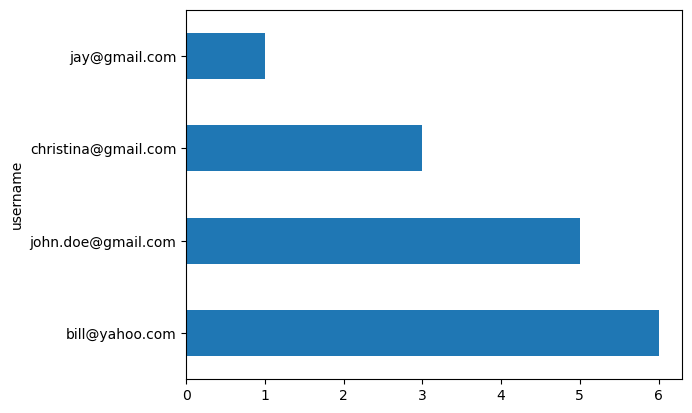

In [14]:
d4.plot(kind='barh')

In [15]:
# how many times employees have punched `in` and punched `out`
d1

,username,date,time,action
0,john.doe@gmail.com,2015-03-01,4:30,in
1,bill@yahoo.com,2015-03-01,4:35,out
2,christina@gmail.com,2015-03-01,4:36,out
3,john.doe@gmail.com,2015-03-01,4:45,out
4,bill@yahoo.com,2015-03-01,4:50,out
5,john.doe@gmail.com,2015-03-02,5:30,out
6,john.doe@gmail.com,2015-03-02,5:45,out
7,john.doe@gmail.com,2015-03-02,6:00,in
8,john.doe@gmail.com,2015-03-02,7:30,out
9,christina@gmail.com,2015-03-02,18:00,out


In [26]:
d5 = d1[['username', 'action']]
d5['count'] = 1
d5

/tmp/ipykernel_4013/366918704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['count'] = 1


,username,action,count
0,john.doe@gmail.com,in,1
1,bill@yahoo.com,out,1
2,christina@gmail.com,out,1
3,john.doe@gmail.com,out,1
4,bill@yahoo.com,out,1
5,john.doe@gmail.com,out,1
6,john.doe@gmail.com,out,1
7,john.doe@gmail.com,in,1
8,john.doe@gmail.com,out,1
9,christina@gmail.com,out,1


In [27]:
d6 = d5.groupby(['username', 'action'])
d6

In [28]:
d7 = d6.sum()
d7.index

MultiIndex([(     'bill@yahoo.com',  'in'),
            (     'bill@yahoo.com', 'out'),
            ('christina@gmail.com',  'in'),
            ('christina@gmail.com', 'out'),
            (      'jay@gmail.com',  'in'),
            (      'jay@gmail.com', 'out'),
            ( 'john.doe@gmail.com',  'in'),
            ( 'john.doe@gmail.com', 'out')],
           names=['username', 'action'])

In [29]:
d7

count
username            action       
bill@yahoo.com      in          1
                    out         6
christina@gmail.com in          2
                    out         3
jay@gmail.com       in          1
                    out         1
john.doe@gmail.com  in          4
                    out         5

<Axes: xlabel='username,action'>

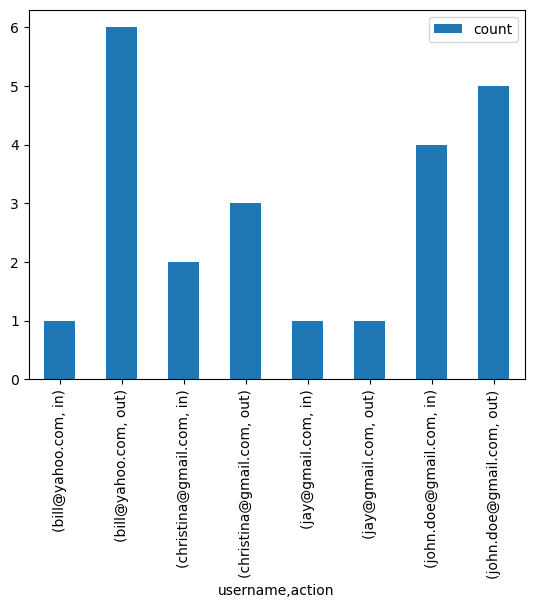

In [30]:
d7.plot(kind='bar')

In [31]:
d7

count
username            action       
bill@yahoo.com      in          1
                    out         6
christina@gmail.com in          2
                    out         3
jay@gmail.com       in          1
                    out         1
john.doe@gmail.com  in          4
                    out         5

In [32]:
d8 = d7.unstack()
d8

count    
action                 in out
username                     
bill@yahoo.com          1   6
christina@gmail.com     2   3
jay@gmail.com           1   1
john.doe@gmail.com      4   5

<Axes: ylabel='username'>

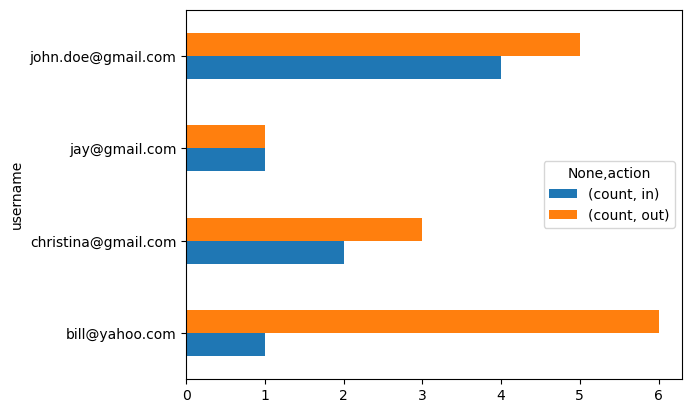

In [34]:
d8.plot(kind='barh')

In [35]:
d9 = d5.pivot_table('count', aggfunc='sum', index='username', columns=['action'])
d9

action,in,out
username,,
bill@yahoo.com,1,6
christina@gmail.com,2,3
jay@gmail.com,1,1
john.doe@gmail.com,4,5
